In [ ]:
%%bash
pip install --upgrade tensorflow

In [1]:
import os, math
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
tf.enable_eager_execution()
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow version 1.13.1


In [2]:
GCS_DIR = 'gs://buoyant-yew-223720/TestFiles/test_fold_structure'

In [3]:
tf.gfile.ListDirectory(GCS_DIR)

['fold1/', 'fold2/']

In [4]:
for fold in tf.gfile.ListDirectory(GCS_DIR):
  print(fold, tf.gfile.ListDirectory(GCS_DIR+'/'+fold))

fold1/ ['not_toxic/', 'toxic/']
fold2/ ['not_toxic/', 'toxic/']


In [5]:
GCS_PATTERN_fold1 = 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/*/*.jpeg'
GCS_PATTERN_fold2 = 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/*/*.jpeg'

In [6]:
CLASSES = ['toxic','not_toxic']

In [7]:
tf.gfile.Glob(GCS_PATTERN_fold1)

['gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row18_Row9_nrow_21885_ID_TOX5051_angles_0_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row18_Row9_nrow_21885_ID_TOX5051_angles_1_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row18_Row9_nrow_21885_ID_TOX5051_angles_2_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row18_Row9_nrow_21885_ID_TOX5051_angles_3_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row18_Row9_nrow_21885_ID_TOX5051_angles_4_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row18_Row9_nrow_21885_ID_TOX5051_angles_5_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row18_Row9_nrow_21885_ID_TOX5051_angles_6_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/

In [8]:
tf.gfile.Glob(GCS_PATTERN_fold2)

['gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row8_Row4_nrow_21875_ID_TOX26454_angles_0_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row8_Row4_nrow_21875_ID_TOX26454_angles_1_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row8_Row4_nrow_21875_ID_TOX26454_angles_2_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row8_Row4_nrow_21875_ID_TOX26454_angles_3_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row8_Row4_nrow_21875_ID_TOX26454_angles_4_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row8_Row4_nrow_21875_ID_TOX26454_angles_5_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row8_Row4_nrow_21875_ID_TOX26454_angles_6_45.jpeg',
 'gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/

In [9]:
def display_9_images_from_dataset(dataset):
  plt.figure(figsize=(13,13))
  subplot=331
  for i, (image, label, one_hot_label) in enumerate(dataset):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image.numpy().astype(np.uint8))
    plt.title(label.numpy().decode("utf-8") + ' ' + str(one_hot_label.numpy()), fontsize=16)
    subplot += 1
    if i==8:
      break
  plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()

In [10]:
nb_images_fold1 = len(tf.gfile.Glob(GCS_PATTERN_fold1))
print("Pattern matches {} images.".format(nb_images_fold1))

filenames_dataset_fold1 = tf.data.Dataset.list_files(GCS_PATTERN_fold1)
for filename in filenames_dataset_fold1.take(10):
  print(filename.numpy().decode('utf-8'))

# copy-pasted from "useful code snippets" below
def decode_jpeg(filename):
  bits = tf.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  return image

image_dataset_fold1 = filenames_dataset_fold1.map(decode_jpeg)
for image in image_dataset_fold1.take(10):
  print(image.numpy().shape)
  

Pattern matches 133 images.
Instructions for updating:
Colocations handled automatically by placer.
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/toxic/mol_title_Row32_dup_Row15_nrow_32897_ID_TOX156_angles_1_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row55_Row40_nrow_21922_ID_TOX6204_angles_1_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/toxic/mol_title_Row34_dup_Row15_nrow_32899_ID_TOX156_angles_3_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/toxic/mol_title_Row36_dup_Row15_nrow_32901_ID_TOX156_angles_7_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row55_Row40_nrow_21922_ID_TOX6204_angles_0_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row51_Row38_nrow_21918_ID_TOX1087_angles_6_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold1/not_toxic/mol_title_Row60_Row44_nrow_21927_ID_TOX5363_ang

In [11]:
nb_images_fold2 = len(tf.gfile.Glob(GCS_PATTERN_fold2))
print("Pattern matches {} images.".format(nb_images_fold2))

filenames_dataset_fold2 = tf.data.Dataset.list_files(GCS_PATTERN_fold2)
for filename in filenames_dataset_fold2.take(10):
  print(filename.numpy().decode('utf-8'))

# copy-pasted from "useful code snippets" below
def decode_jpeg(filename):
  bits = tf.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  return image

image_dataset_fold2 = filenames_dataset_fold2.map(decode_jpeg)
for image in image_dataset_fold2.take(10):
  print(image.numpy().shape)

Pattern matches 20 images.
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row8_Row4_nrow_21875_ID_TOX26454_angles_0_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row8_Row4_nrow_21875_ID_TOX26454_angles_7_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/toxic/mol_title_Row1_dup_Row14_nrow_32866_ID_TOX26101_angles_0_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row8_Row4_nrow_21875_ID_TOX26454_angles_2_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/toxic/mol_title_Row0_dup_Row14_nrow_32865_ID_TOX26101_angles_5_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/not_toxic/mol_title_Row9_Row4_nrow_21876_ID_TOX26454_angles_0_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/toxic/mol_title_Row0_dup_Row14_nrow_32865_ID_TOX26101_angles_4_45.jpeg
gs://buoyant-yew-223720/TestFiles/test_fold_structure/fold2/

In [12]:
def decode_jpeg_and_label(filename):
  bits = tf.read_file(filename)
  image = tf.image.decode_jpeg(bits)
  label = tf.string_split(tf.expand_dims(filename, axis=-1), delimiter='/')
  label = label.values[-2]
  one_hot_label = tf.tile(tf.expand_dims(label, axis=-1), [len(CLASSES)])
  one_hot_label = tf.cast(tf.equal(one_hot_label, CLASSES), tf.uint8)
  return image, label, one_hot_label

dataset_fold1 = filenames_dataset_fold1.map(decode_jpeg_and_label)
for image, label, one_hot_label in dataset_fold1.take(10):
  print(image.numpy().shape, label.numpy().decode('utf-8'), one_hot_label.numpy())
dataset_fold2 = filenames_dataset_fold2.map(decode_jpeg_and_label)
for image, label, one_hot_label in dataset_fold2.take(10):
  print(image.numpy().shape, label.numpy().decode('utf-8'), one_hot_label.numpy())

(525, 576, 3) not_toxic [0 1]
(525, 576, 3) not_toxic [0 1]
(525, 576, 3) toxic [1 0]
(525, 576, 3) not_toxic [0 1]
(525, 576, 3) toxic [1 0]
(525, 576, 3) toxic [1 0]
(525, 576, 3) toxic [1 0]
(525, 576, 3) toxic [1 0]
(525, 576, 3) not_toxic [0 1]
(525, 576, 3) not_toxic [0 1]
(525, 576, 3) toxic [1 0]
(525, 576, 3) not_toxic [0 1]
(525, 576, 3) toxic [1 0]
(525, 576, 3) toxic [1 0]
(525, 576, 3) not_toxic [0 1]
(525, 576, 3) not_toxic [0 1]
(525, 576, 3) toxic [1 0]
(525, 576, 3) not_toxic [0 1]
(525, 576, 3) toxic [1 0]
(525, 576, 3) toxic [1 0]


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


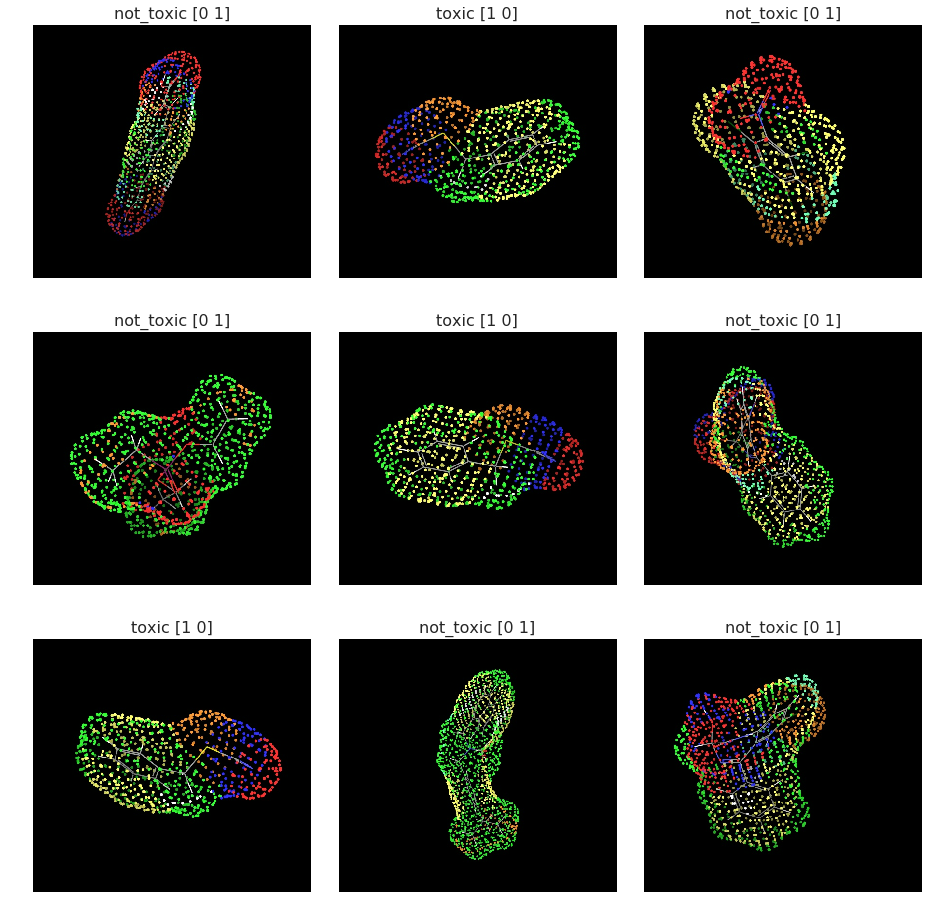

In [13]:
display_9_images_from_dataset(dataset_fold1)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


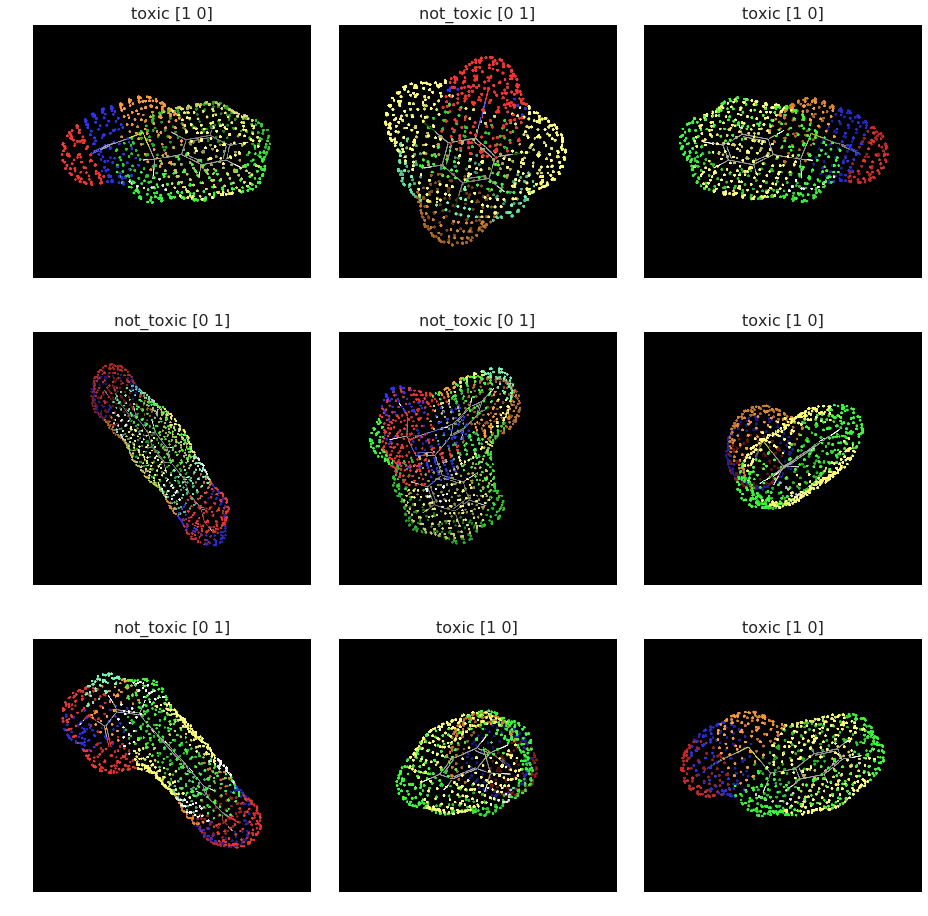

In [14]:
display_9_images_from_dataset(dataset_fold1)

In [15]:
# backend identification
IS_COLAB_BACKEND = 'COLAB_GPU' in os.environ  # this is always set on Colab, the value is 0 or 1 depending on GPU presence
if IS_COLAB_BACKEND:
  from google.colab import auth
  auth.authenticate_user()  # not necessary to access a public bucket but you will probably want to access your private buckets too
  
HAS_COLAB_TPU = 'COLAB_TPU_ADDR' in os.environ
assert not HAS_COLAB_TPU, "Please select a GPU backend for this notebook. Pre-trained models in tf.keras.applications.* are not yet TPU-compatible"

In [16]:
BATCH_SIZE = 64 # 128 works on GPU too but comes very close to the memory limit of the Colab GPU
EPOCHS = 10
IMAGE_SIZE = 28
VALIDATION_SPLIT = 0.19

# splitting data files between training and validation
filenames_fold1 = tf.gfile.Glob(GCS_PATTERN_fold1)
filenames_fold2 = tf.gfile.Glob(GCS_PATTERN_fold2)
#split = int(len(filenames_fold1) * VALIDATION_SPLIT)
training_filenames = filenames_fold1
validation_filenames = filenames_fold2
#print("Pattern matches {} data files. Splitting dataset into {} training files and {} validation files".format(len(filenames), len(training_filenames), len(validation_filenames)))
validation_steps = int(3670 // (len(filenames_fold1)+len(filenames_fold2)) * len(filenames_fold2)) // BATCH_SIZE
steps_per_epoch = int(3670 // (len(filenames_fold1)+len(filenames_fold2)) * len(filenames_fold1)) // BATCH_SIZE
print("With a batch size of {}, there will be {} batches per training epoch and {} batch(es) per validation run.".format(BATCH_SIZE, steps_per_epoch, validation_steps))


With a batch size of 64, there will be 47 batches per training epoch and 7 batch(es) per validation run.


In [17]:
def read_tfrecord(example):
    features = {
        "image": tf.FixedLenFeature((), tf.string), # tf.string means byte string
        "label": tf.FixedLenFeature((), tf.string),
        "one_hot_label": tf.FixedLenFeature((), tf.string)
    }
    example = tf.parse_single_example(example, features)
    image = tf.image.decode_jpeg(example['image'])
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.reshape(image, [IMAGE_SIZE,IMAGE_SIZE, 3])
    one_hot_label = tf.decode_raw(example['one_hot_label'], out_type=tf.uint8) # 'decode' byte string into byte list
    one_hot_label = tf.cast(one_hot_label, tf.float32)  # convert one hot labels to floats
    one_hot_label = tf.reshape(one_hot_label, [5])  # explicit fixed size needed on TPU
    label = example['label']  # byte string
    return image, label, one_hot_label

def load_dataset(filenames):  
  # read from tfrecs
  records = tf.data.TFRecordDataset(filenames, num_parallel_reads=32)  # this will read from multiple GCS files in parallel
  dataset = records.map(read_tfrecord, num_parallel_calls=32)
  return dataset

In [18]:
def features_and_targets(image, label, one_hot_label):
  feature = image
  target = one_hot_label
  return feature, target  # for training, a Keras model needs 2 items: features and targets


def get_batched_dataset(filenames):
  dataset = load_dataset(filenames)
  dataset = dataset.map(features_and_targets, num_parallel_calls=32)
  dataset = dataset.cache() # This dataset fits in RAM
  dataset = dataset.repeat()
  #dataset = dataset.batch_and_drop_remainder(BATCH_SIZE)
  dataset = dataset.batch(BATCH_SIZE, drop_remainder=True) # drop_remainder needed on TPU
  dataset = dataset.prefetch(-1) # prefetch next batch while training (-1: autotune prefetch buffer size)
  # should shuffle too but this dataset was well shuffled on disk already
  return dataset

# instantiate the datasets
training_dataset = get_batched_dataset(training_filenames)
validation_dataset = get_batched_dataset(validation_filenames)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(20, kernel_size=(5,5), input_shape=[IMAGE_SIZE,IMAGE_SIZE, 3], activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    #tf.keras.layers.Conv2D(50, kernel_size=(5,5), activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(
    optimizer=tf.train.AdadeltaOptimizer(),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        1520      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2880)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 5762      
Total params: 7,282
Trainable params: 7,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(steps_per_epoch, EPOCHS)
history = model.fit(training_dataset, steps_per_epoch=steps_per_epoch, epochs=EPOCHS)

47 10
Epoch 1/10
